In [5]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
network = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [14]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Before training, we need to preprocess the data into the shape that thet network expects and normalizing the pixel values into the range [0, 1].

In [15]:
train_images[0].max()

255

In [16]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [18]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
train_labels = to_categorical(train_labels)

In [23]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
test_labels = to_categorical(test_labels)

In [26]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0273 - accuracy: 0.9918
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0213 - accuracy: 0.9939
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0160 - accuracy: 0.9954
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0122 - accuracy: 0.9964
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0098 - accuracy: 0.9972


In [27]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [30]:
print(f'test_acc: {test_acc:.3f}')

test_acc: 0.981


In [31]:
import matplotlib.pyplot as plt

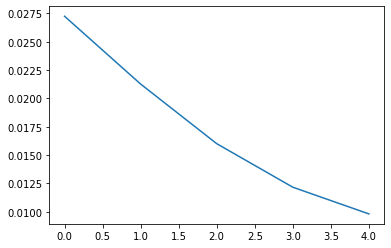

In [32]:
plt.plot(history.history['loss'])